(569, 3)
Thresholds:
[           inf 9.99895027e-01 8.01168685e-01 7.96949981e-01
 7.66423661e-01 7.24351735e-01 7.21490457e-01 6.15327126e-01
 4.84651394e-01 4.61261955e-01 4.48242689e-01 4.09021556e-01
 3.75213613e-01 2.33383776e-01 2.01232687e-01 4.51215739e-07]
Lengths
16 16 16


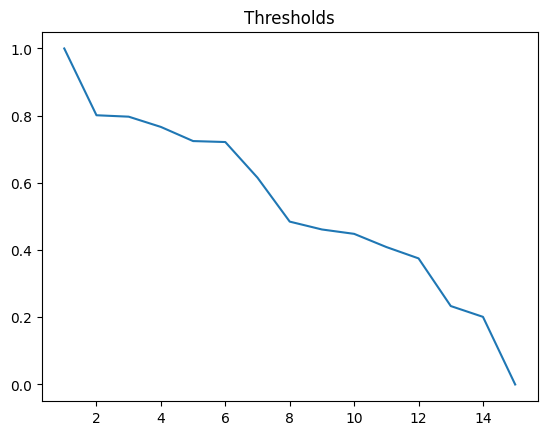

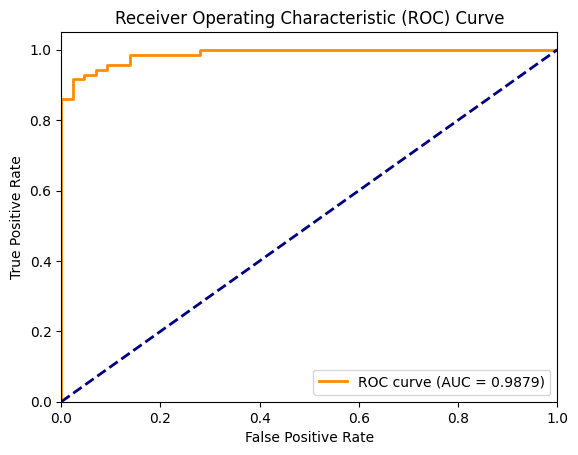

In [27]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Load the Breast Cancer dataset
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target

X = X[:,0:3]

print(X.shape)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression classifier
clf = LogisticRegression(max_iter = int(1e5))
clf.fit(X_train, y_train)

# Get predicted probabilities for the positive class (class 1)
y_score = clf.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

print("Thresholds:")
print(thresholds)

print('Lengths')
print(len(fpr), len(tpr), len(thresholds))
plt.figure()
plt.plot(thresholds)
plt.title('Thresholds')

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.4f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()